## Capston Project Notebook

In [14]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

About dataset
This dataset is about past loans. The Loan_train.csv data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

Field	Description
Loan_status	Whether a loan is paid off on in collection
Principal	Basic principal loan amount at the
Terms	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
Effective_date	When the loan got originated and took effects
Due_date	Since it’s one-time payoff schedule, each loan has one single due date
Age	Age of applicant
Education	Education of applicant
Gender	The gender of applicant
Lets download the dataset

## Load Data From CSV File

In [19]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-01-01 12:47:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-01-01 12:47:11 (14.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [20]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [21]:
df.shape

(346, 10)

## Convert date and Time 

In [22]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and Data Preprocessing
Let’s see how many of each class is in our data set

In [23]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection

Lets plot some columns to underestand data better:

In [24]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2019.11.27 |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_0         156 KB  anaconda
    seaborn-0.9.0              |     pyh91ea838_1         164 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0       --> 2019.11.27-0       anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_0  anaconda
    openssl:         1.1.1d-h7b6447c_3  --> 1.1.1-h7b6447c_0   anaconda
    seaborn:         0.9.0-py

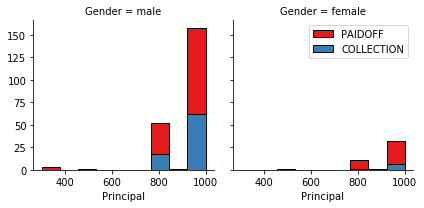

In [25]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction
Lets look at the day of the week people get the loan

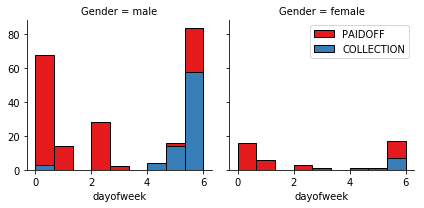

In [28]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [29]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


Convert Categorical features to numerical values
Lets look at gender:

In [30]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Lets convert male to 0 and female to 1:

In [31]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding
How about education?

In [32]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [33]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [34]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection
Lets defind feature sets, X:

In [35]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [36]:
#y = df['loan_status'].values
#df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#y[0:5]
y = df['loan_status'].apply(lambda loan_status: 0 if loan_status == 'PAIDOFF' else 1)
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## Normalize Data
Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [37]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Classification
Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression
Notice:

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

## K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.
warning: You should not use the loan_test.csv for finding the best k, however, you can split your train_loan.csv into train and test to find the best k.

In [43]:
# split the data into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=30)
print ("Training features shape:", X_train.shape)
print ("test features shape: ", X_test.shape)
print ("training labels shape: ", Y_train.shape)

Training features shape: (259, 8)
test features shape:  (87, 8)
training labels shape:  (259,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
kneighbor = KNeighborsClassifier(n_neighbors=7)
kneighbor.fit(X_train, Y_train)
y_hat = kneighbor.predict(X_test)

In [45]:
from sklearn import metrics # jaccard score and f1 score
print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(Y_train, kneighbor.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(Y_test, y_hat))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, kneighbor.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat))

Train set Accuracy (Jaccard):  0.7722007722007722
Test set Accuracy (Jaccard):  0.8620689655172413
Train set Accuracy (F1):  0.5426356589147286
Test set Accuracy (F1):  0.6


## Decision Tree

In [46]:
# import the decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [47]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
loanTree.fit(X_train, Y_train)
y_hat_LTr = loanTree.predict(X_test)

In [48]:
print("Train set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_train, loanTree.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_test, y_hat_LTr))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, loanTree.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_LTr))

Train set Accuracy (Jaccard):  0.7837837837837838
Test set Accuracy (Jaccard):  0.735632183908046
Train set Accuracy (F1):  0.5483870967741935
Test set Accuracy (F1):  0.34285714285714286


## Support Vector Machine

In [49]:
# import svm 
from sklearn import svm
clf1 = svm.SVC(kernel='rbf', gamma=0.7)

In [50]:
# prediction part

clf1.fit(X_train, Y_train) 
y_hat_SVM = clf1.predict(X_test)

In [51]:
print("Train set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_train, clf1.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(Y_test, y_hat_SVM))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, clf1.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_SVM))

Train set Accuracy (Jaccard):  0.7876447876447876
Test set Accuracy (Jaccard):  0.7701149425287356
Train set Accuracy (F1):  0.4859813084112149
Test set Accuracy (F1):  0.16666666666666669


## Logistic Regression

In [52]:
# import logistic classifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,Y_train)#libilinear is good for small data-set

In [53]:
y_hat_LR = LR.predict(X_test)

from sklearn.metrics import jaccard_similarity_score
print ("Jaccard score: ", jaccard_similarity_score(Y_test, y_hat_LR))

print("Train set Accuracy (F1): ", metrics.f1_score(Y_train, LR.predict(X_train)))
print("Test set Accuracy (F1): ", metrics.f1_score(Y_test, y_hat_LR))

Jaccard score:  0.8275862068965517
Train set Accuracy (F1):  0.41666666666666663
Test set Accuracy (F1):  0.4827586206896552


In [54]:
# log loss for logistic 
from sklearn.metrics import log_loss

y_hat_prob1_LR = LR.predict_proba(X_test)
print ("Log loss score: ", log_loss(Y_test, y_hat_prob1_LR))

Log loss score:  0.6679306006663686


## Model Evaluation using Test set

In [55]:

!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-01-01 13:29:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-01-01 13:29:04 (422 MB/s) - ‘loan_test.csv’ saved [3642/3642]



## Load Test set for evaluation

In [56]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(6)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male


In [57]:
# process the data set as before 

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek 
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True) # 0 for male and 1 for female
test_df.head(54)
print (test_df.dtypes)

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
weekend                    int64
dtype: object


In [58]:
feature_test = test_df[['Principal','terms','age','Gender','weekend']]
feature_test = pd.concat([feature_test,pd.get_dummies(test_df['education'])], axis=1)
feature_test.drop(['Master or Above'], axis = 1,inplace=True)
print (type(feature_test))



X_test_loan = feature_test
X_test_loan[0:5]

<class 'pandas.core.frame.DataFrame'>


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [59]:
test_df_n = test_df.loan_status.replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[0,1])
print (test_df_n.head(3))
y_test_loan = test_df_n.values
print ("labels type: ", type(y_test_loan))
y_test_loan[0:5]

0    0
1    0
2    0
Name: loan_status, dtype: int64
labels type:  <class 'numpy.ndarray'>


array([0, 0, 0, 0, 0])

In [60]:
# standardize the features

X_test_loan= preprocessing.StandardScaler().fit(X_test_loan).transform(X_test_loan)
X_test_loan[0:5]
print (type(X_test_loan))
print ("shape of loan test data: ", X_test_loan.shape)
#print (X_test_loan.shape, y_test_loan.shape)

<class 'numpy.ndarray'>
shape of loan test data:  (54, 8)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


Use the classifiers on the test data set and find the best scores
## K Nearest Neighbor

In [61]:
#kneighbor1 = KNeighborsClassifier(n_neighbors=7)
#kneighbor1.fit(X_train, Y_train)

y1_hat = kneighbor.predict(X_test_loan)

print("Test data-set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(y_test_loan, y1_hat))
print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y1_hat))

Test data-set Accuracy (Jaccard):  0.7037037037037037
Test set Accuracy (F1):  0.3333333333333333


In [62]:
#loanTree1 = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
#loanTree1.fit(X_train, Y_train)
y1_hat_LTr = loanTree.predict(X_test_loan)


print("Test data-set Accuracy (Jaccard): ", metrics.jaccard_similarity_score(y_test_loan, y1_hat_LTr))
print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y1_hat_LTr))

Test data-set Accuracy (Jaccard):  0.8148148148148148
Test set Accuracy (F1):  0.5454545454545454


## Lineae Regression

In [63]:
y1_hat_LR = LR.predict(X_test_loan)

y1_hat_prob1_LR = LR.predict_proba(X_test_loan)

print ("Test data-set Accuracy (Jaccard): ", jaccard_similarity_score(y_test_loan, y1_hat_LR))
print("Test set Accuracy (F1): ", metrics.f1_score(y_test_loan, y1_hat_LR))
print ("Log loss score: ", log_loss(y_test_loan, y1_hat_prob1_LR))

Test data-set Accuracy (Jaccard):  0.7777777777777778
Test set Accuracy (F1):  0.4
Log loss score:  0.671749679111244


## Report


 ## Algorithm	       Jaccard  F1-score	LogLoss


 KNN	      0.703	      0.333	       NA

Decision Tree	0.815	0.545	NA

SVM	0.722	0.286	NA

LogisticRegression	0.778	0.40	0.672